## Feature Engineering

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com 
### Date: Nov.8th, 2023

### Table of Contents
- [New Column Alcohol Type](#New-Column-Alcohol-Type)
- [New Column Profit](#New-Column-Profit)
- [New Column Month Week Day](#New-Column-Month-and-Day-and-Week)
- [Dummy Varibales for Volume](#Dummy-Variables-for-Volume)
- [Correlations](#Correlations)

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df8=pd.read_parquet('IowaAfterClean3.parquet')

In [4]:
df8.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,Adair,1081600.0,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,Adair,1081200.0,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,Adams,1031100.0,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,Allamakee,1012200.0,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

Make a subset to run the codes faster

In [50]:
subset_df = df8.sample(n=50000, random_state=42)

### 

### New Column-Alcohol Type

We would like to have a new column that categorize alcohol in more general ways.

In [7]:
print(subset_df['category_name'].unique())

['American Schnapps' 'American Flavored Vodka' 'Canadian Whiskies'
 'Cocktails /RTD' 'White Rum' 'American Vodka' 'Flavored Rum'
 'Imported Brandies' 'Spiced Rum' 'Straight Bourbon Whiskies'
 'Temporary & Specialty Packages' 'Flavored Gin' '100% Agave Tequila'
 'Imported Dry Gins' 'Blended Whiskies' 'American Cordials & Liqueur'
 'Tennessee Whiskies' 'Whiskey Liqueur' 'Triple Sec' 'Coffee Liqueurs'
 'American Brandies' 'Imported Cordials & Liqueur' 'Imported Vodka'
 'American Dry Gins' 'Mixto Tequila' 'Cream Liqueurs'
 'Neutral Grain Spirits' 'American Distilled Spirits Specialty'
 'Imported Flavored Vodka' 'Single Malt Scotch' 'Scotch Whiskies'
 'Imported Schnapps' 'Irish Whiskies' 'Gold Rum' 'Bottled in Bond Bourbon'
 'Single Barrel Bourbon Whiskies' 'Mezcal' 'Straight Rye Whiskies'
 'Special Order Items' 'Aged Dark Rum'
 'Imported Distilled Spirits Specialty' 'American Sloe Gins'
 'Corn Whiskies' 'Distilled Spirits Specialty']


In [8]:
sorted_unique_categories = subset_df['category_name'].unique()
sorted_unique_categories.sort()
print(sorted_unique_categories)

['100% Agave Tequila' 'Aged Dark Rum' 'American Brandies'
 'American Cordials & Liqueur' 'American Distilled Spirits Specialty'
 'American Dry Gins' 'American Flavored Vodka' 'American Schnapps'
 'American Sloe Gins' 'American Vodka' 'Blended Whiskies'
 'Bottled in Bond Bourbon' 'Canadian Whiskies' 'Cocktails /RTD'
 'Coffee Liqueurs' 'Corn Whiskies' 'Cream Liqueurs'
 'Distilled Spirits Specialty' 'Flavored Gin' 'Flavored Rum' 'Gold Rum'
 'Imported Brandies' 'Imported Cordials & Liqueur'
 'Imported Distilled Spirits Specialty' 'Imported Dry Gins'
 'Imported Flavored Vodka' 'Imported Schnapps' 'Imported Vodka'
 'Irish Whiskies' 'Mezcal' 'Mixto Tequila' 'Neutral Grain Spirits'
 'Scotch Whiskies' 'Single Barrel Bourbon Whiskies' 'Single Malt Scotch'
 'Special Order Items' 'Spiced Rum' 'Straight Bourbon Whiskies'
 'Straight Rye Whiskies' 'Temporary & Specialty Packages'
 'Tennessee Whiskies' 'Triple Sec' 'Whiskey Liqueur' 'White Rum']


In [51]:
category_mapping = {
    '100% Agave Tequila': 'Tequila',
    'Aged Dark Rum': 'Rum',
    'American Brandies': 'Brandy',
    'American Cordials & Liqueur': 'Cordials & Liqueur',
    'American Distilled Spirits Specialty': 'Specialty',
    'American Dry Gins': 'Gin',
    'American Flavored Vodka': 'Vodka',
    'American Schnapps': 'Schnapps',
    'American Sloe Gins': 'Gin',
    'American Vodka': 'Vodka',
    'Blended Whiskies': 'Whisky',
    'Bottled in Bond Bourbon': 'Bourbon',
    'Canadian Whiskies': 'Whisky',
    'Cocktails /RTD': 'Cocktail',
    'Coffee Liqueurs': 'Cordials & Liqueur',
    'Corn Whiskies': 'Whisky',
    'Cream Liqueurs': 'Cordials & Liqueur',
    'Distilled Spirits Specialty': 'Specialty',
    'Flavored Gin': 'Gin',
    'Flavored Rum': 'Rum',
    'Gold Rum': 'Rum',
    'Imported Brandies': 'Brandy',
    'Imported Cordials & Liqueur': 'Cordials & Liqueur',
    'Imported Distilled Spirits Specialty': 'Specialty',
    'Imported Dry Gins': 'Gin',
    'Imported Flavored Vodka': 'Vodka',
    'Imported Schnapps': 'Schnapps',
    'Imported Vodka': 'Vodka',
    'Irish Whiskies': 'Whisky',
    'Mezcal': 'Other Categories', 
    'Mixto Tequila': 'Tequila',
    'Neutral Grain Spirits': 'Spirits',
    'Scotch Whiskies': 'Whisky',
    'Single Barrel Bourbon Whiskies': 'Whisky',
    'Single Malt Scotch': 'Scotch',
    'Special Order Items': 'Specialty',
    'Spiced Rum': 'Rum',
    'Straight Bourbon Whiskies': 'Whisky',
    'Straight Rye Whiskies': 'Whisky',
    'Temporary & Specialty Packages': 'Specialty',
    'Tennessee Whiskies': 'Whisky',
    'Triple Sec': 'Cordials & Liqueur',
    'Whiskey Liqueur': 'Spirits', 
    'White Rum': 'Rum'
}

# Apply mapping to create a new column 'Alcohol_Type'
subset_df['Alcohol_Type'] = subset_df['category_name'].map(category_mapping).fillna('Other Categories')

In [10]:
#sanity check
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1418613 to 1602341
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  50000 non-null  object 
 1   date                     50000 non-null  object 
 2   store_number             50000 non-null  int64  
 3   store_name               50000 non-null  object 
 4   address                  50000 non-null  object 
 5   city                     50000 non-null  object 
 6   zip_code                 50000 non-null  float64
 7   county_number            50000 non-null  float64
 8   county                   50000 non-null  object 
 9   category                 50000 non-null  float64
 10  category_name            50000 non-null  object 
 11  vendor_number            50000 non-null  float64
 12  vendor_name              50000 non-null  object 
 13  item_number              50000 non-null  int64  
 14  item_descripti

###

### New Column-Profit

In [52]:
subset_df['profit'] = (subset_df['state_bottle_retail'] - subset_df['state_bottle_cost']) * subset_df['bottles_sold']

In [12]:
#sanity check
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1418613 to 1602341
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  50000 non-null  object 
 1   date                     50000 non-null  object 
 2   store_number             50000 non-null  int64  
 3   store_name               50000 non-null  object 
 4   address                  50000 non-null  object 
 5   city                     50000 non-null  object 
 6   zip_code                 50000 non-null  float64
 7   county_number            50000 non-null  float64
 8   county                   50000 non-null  object 
 9   category                 50000 non-null  float64
 10  category_name            50000 non-null  object 
 11  vendor_number            50000 non-null  float64
 12  vendor_name              50000 non-null  object 
 13  item_number              50000 non-null  int64  
 14  item_descripti

In [13]:
subset_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,Alcohol_Type,profit
1418613,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,Carroll,1081400.0,...,10,50,5.16,7.74,2,15.48,0.08,0.02,Schnapps,5.16
2429266,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,Mills,1031200.0,...,6,1750,11.50,17.25,6,103.50,10.50,2.77,Vodka,34.50
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,Madison,1012100.0,...,6,1750,14.50,21.75,6,130.50,10.50,2.77,Whisky,43.50
2252745,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,Carroll,1071100.0,...,12,375,8.75,9.00,4,36.00,1.50,0.39,Cocktail,1.00
695507,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,Guthrie,1081400.0,...,10,50,5.16,7.74,10,77.40,0.50,0.13,Schnapps,25.80


#### With new column profit, now we can draw the graph to see the relationship between profit and other features.

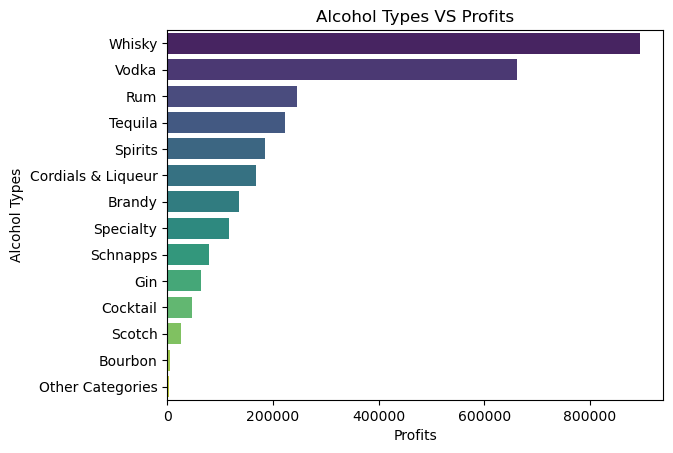

In [54]:
profit_by_type = subset_df.groupby('Alcohol_Type')['profit'].sum().reset_index()

# Order the DataFrame by profit in descending order
profit_by_type = profit_by_type.sort_values(by='profit', ascending=False)

plt.figure()
sns.barplot(x='profit', y='Alcohol_Type', data=profit_by_type, palette='viridis')

# Customize the plot
plt.title('Alcohol Types VS Profits')
plt.xlabel('Profits')
plt.ylabel('Alcohol Types')

# Show the plot
plt.show()

Whisky is the most profitable alcohol category, showing significantly higher profits compared to the other types. Vodka is the second most profitable, with profits around the 600,000 units mark.
Specialty, Schnapps, and Gin have lower profits compared to the previously mentioned categories, with profits seemingly between 100,000 and 200,000 dollars.
Scotch, Bourbon, and Other Categories are the least profitable. 
The 'Other Categories' appears to be the least profitable among all the categories listed.

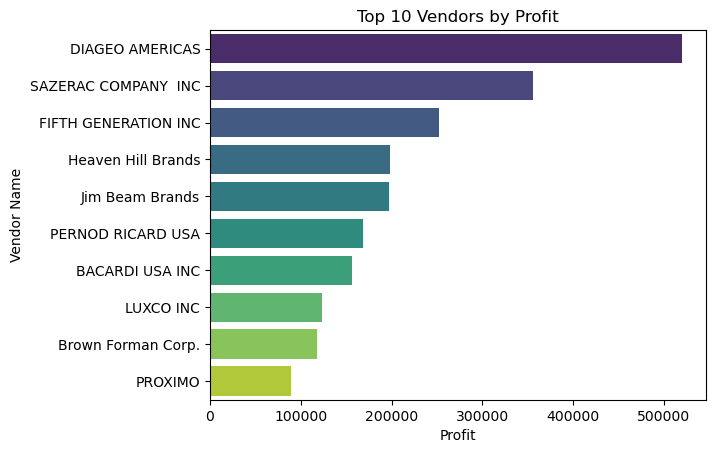

In [56]:
profit_by_vendor = subset_df.groupby('vendor_name')['profit'].sum().reset_index()

# Order the DataFrame by profit in descending order
profit_by_vendor = profit_by_vendor.sort_values(by='profit', ascending=False)

# Select the top 10 vendors
top_10_vendors = profit_by_vendor.head(10)

# Create a bar plot for the top 10 vendors
plt.figure()
sns.barplot(x='profit', y='vendor_name', data=top_10_vendors, palette='viridis')

# Customize the plot
plt.title('Top 10 Vendors by Profit')
plt.xlabel('Profit')
plt.ylabel('Vendor Name')
plt.show()

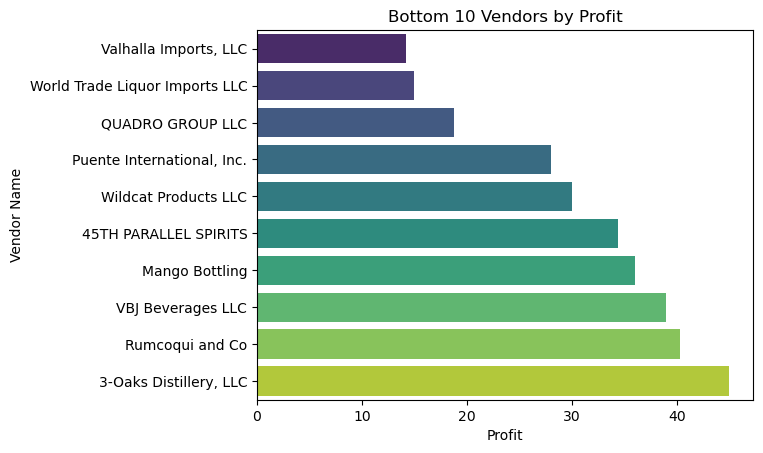

In [59]:
profit_by_vendor = profit_by_vendor.sort_values(by='profit', ascending=True)

# Select the top 10 vendors
Bottom_10_vendors = profit_by_vendor.head(10)

plt.figure()
sns.barplot(x='profit', y='vendor_name', data=Bottom_10_vendors, palette='viridis')

plt.title('Bottom 10 Vendors by Profit')
plt.xlabel('Profit')
plt.ylabel('Vendor Name')
plt.show()

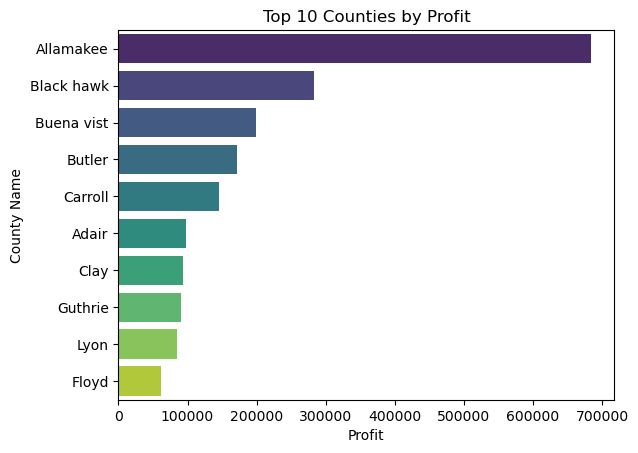

In [60]:
profit_by_county = subset_df.groupby('county')['profit'].sum().reset_index()
profit_by_county= profit_by_county.sort_values(by='profit', ascending=False)

# Select the top 10 vendors
top_10_county = profit_by_county.head(10)

# Create a bar plot for the top 10 vendors
plt.figure()
sns.barplot(x='profit', y='county', data=top_10_county, palette='viridis')

# Customize the plot
plt.title('Top 10 Counties by Profit')
plt.xlabel('Profit')
plt.ylabel('County Name')
plt.show()

###

### New Column-Month and Day and Week

In [14]:
# Convert the 'date' column to datetime
subset_df['date'] = pd.to_datetime(subset_df['date'])

# Extract day, month, and week into new columns
subset_df['day'] = subset_df['date'].dt.day
subset_df['month'] = subset_df['date'].dt.month
subset_df['week'] = subset_df['date'].dt.week

In [15]:
#sanity Check
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1418613 to 1602341
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  50000 non-null  object        
 1   date                     50000 non-null  datetime64[ns]
 2   store_number             50000 non-null  int64         
 3   store_name               50000 non-null  object        
 4   address                  50000 non-null  object        
 5   city                     50000 non-null  object        
 6   zip_code                 50000 non-null  float64       
 7   county_number            50000 non-null  float64       
 8   county                   50000 non-null  object        
 9   category                 50000 non-null  float64       
 10  category_name            50000 non-null  object        
 11  vendor_number            50000 non-null  float64       
 12  vendor_name             

Check data visually

In [16]:
profit_month=subset_df.groupby(['month'])['profit'].sum().reset_index()

In [17]:
profit_month.head()

,month,profit
0,1,443265.57
1,2,178188.90
2,3,226708.21
3,4,207953.41
4,5,198173.62


#### Our dataset contains data from Jan 03 2021 to Jan 30 2022, therefore we need to divide the profit of Jan into 2.

In [18]:
# Divide the profit of the first month by 2
first_month_profit = profit_month.loc[profit_month['month'] == 1, 'profit'].values[0]
profit_month.loc[profit_month['month'] == 1, 'profit'] = first_month_profit / 2

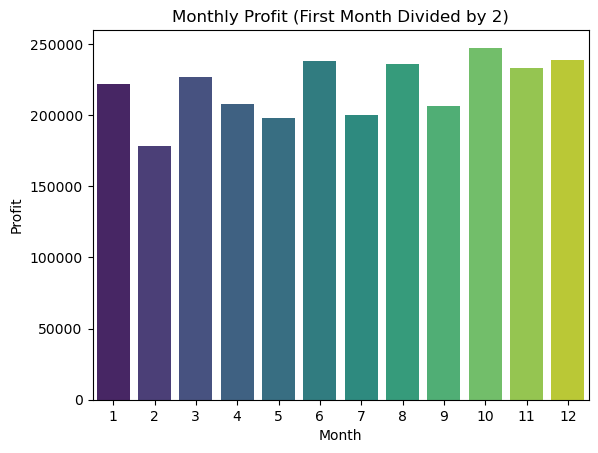

In [19]:
# Create a bar plot
plt.figure()
sns.barplot(x='month', y='profit', data=profit_month, palette='viridis')

# Customize the plot
plt.title('Monthly Profit (First Month Divided by 2)')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.show()

The business experiences a seasonal increase in profits, particularly strong in the latter part of the year, potentially due to holiday sales or other end-of-year activities. 
There appears to be an increasing trend in profit from the second month to the last. The profit rises moderately from February to July, after which there is a more noticeable increase from August to December. This pattern suggests a seasonal trend where profits increase in the second half of the year.

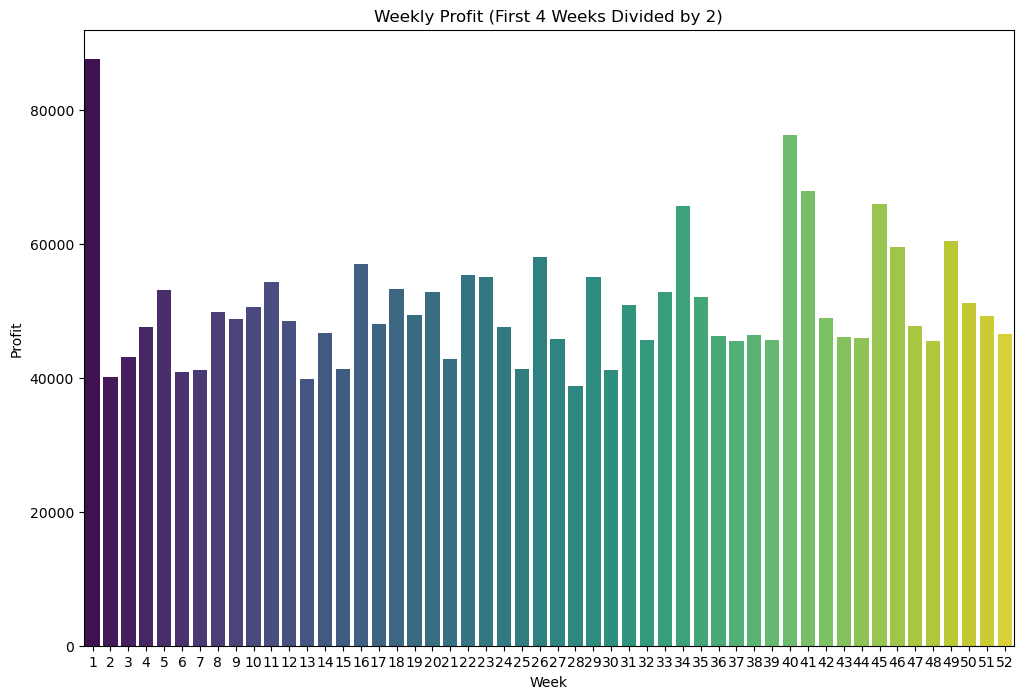

In [20]:
# Calculate weekly profit
profit_week = subset_df.groupby(['week'])['profit'].sum().reset_index()

# Divide the profit of the first 4 weeks by 2
first_4_weeks_profit = profit_week.loc[profit_week['week'].isin(range(1, 5)), 'profit']
profit_week.loc[profit_week['week'].isin(range(1, 5)), 'profit'] = first_4_weeks_profit / 2

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='week', y='profit', data=profit_week, palette='viridis')

# Customize the plot
plt.title('Weekly Profit (First 4 Weeks Divided by 2)')
plt.xlabel('Week')
plt.ylabel('Profit')

# Show the plot
plt.show()

There is considerable fluctuation in weekly profit throughout the year. There is a notable increase in profit around the middle of the year, particularly in weeks 26 through 30. We found that in week 26, there was Independence Day for the United States(July.4th).In addition, there is a significant increase towards the end of the year, from week 39 onwards, with the peak in week 43. Week 43 was the week for Halloween.The profit remains relatively high after this peak, which might correspond with continued holiday sales or other year-end factors.

###

### Dummy Variables for Volume

In [21]:
subset_df['volume_sold_liters'].unique()

array([8.0000e-02, 1.0500e+01, 1.5000e+00, 5.0000e-01, 8.8000e+00,
       4.8000e+01, 4.0000e-02, 4.5000e+00, 9.0000e+00, 1.0000e+00,
       3.0000e+00, 3.6000e+01, 3.1500e+01, 5.2500e+00, 2.1000e+01,
       9.6000e+00, 7.2000e-01, 1.8700e+00, 1.1000e+00, 1.2000e+01,
       6.0000e+01, 2.2500e+00, 3.5000e+00, 9.4500e+01, 2.0000e-01,
       5.2500e+01, 4.8000e+02, 3.0000e-01, 6.0000e+00, 2.0000e+00,
       3.4000e-01, 6.0000e-01, 2.7000e+01, 2.6250e+02, 1.8000e+01,
       1.4400e+01, 4.5000e+01, 2.4000e+01, 3.7500e+00, 1.1000e-01,
       2.4000e+00, 1.2000e+00, 1.7500e+00, 2.5000e+00, 5.0000e+00,
       1.8000e+02, 6.7500e+00, 6.3000e+01, 7.3500e+01, 4.0000e+00,
       2.3000e-01, 4.2000e+01, 8.0000e-01, 1.1250e+02, 1.2600e+02,
       4.8000e+00, 4.0000e-01, 1.3500e+01, 2.1000e+02, 8.2500e+00,
       1.8000e+00, 1.1550e+02, 3.8400e+01, 3.3600e+01, 9.0000e+01,
       5.4000e+01, 1.6000e+00, 1.5750e+01, 3.6000e+00, 7.0000e+00,
       1.4000e+00, 1.3650e+02, 1.3500e+02, 2.2500e+01, 8.7500e

In [22]:
array = np.array([8.0000e-02, 1.0500e+01, 1.5000e+00, 5.0000e-01, 8.8000e+00,
       4.8000e+01, 4.0000e-02, 4.5000e+00, 9.0000e+00, 1.0000e+00,
       3.0000e+00, 3.6000e+01, 3.1500e+01, 5.2500e+00, 2.1000e+01,
       9.6000e+00, 7.2000e-01, 1.8700e+00, 1.1000e+00, 1.2000e+01,
       6.0000e+01, 2.2500e+00, 3.5000e+00, 9.4500e+01, 2.0000e-01,
       5.2500e+01, 4.8000e+02, 3.0000e-01, 6.0000e+00, 2.0000e+00,
       3.4000e-01, 6.0000e-01, 2.7000e+01, 2.6250e+02, 1.8000e+01,
       1.4400e+01, 4.5000e+01, 2.4000e+01, 3.7500e+00, 1.1000e-01,
       2.4000e+00, 1.2000e+00, 1.7500e+00, 2.5000e+00, 5.0000e+00,
       1.8000e+02, 6.7500e+00, 6.3000e+01, 7.3500e+01, 4.0000e+00,
       2.3000e-01, 4.2000e+01, 8.0000e-01, 1.1250e+02, 1.2600e+02,
       4.8000e+00, 4.0000e-01, 1.3500e+01, 2.1000e+02, 8.2500e+00,
       1.8000e+00, 1.1550e+02, 3.8400e+01, 3.3600e+01, 9.0000e+01,
       5.4000e+01, 1.6000e+00, 1.5750e+01, 3.6000e+00, 7.0000e+00,
       1.4000e+00, 1.3650e+02, 1.3500e+02, 2.2500e+01, 8.7500e+00,
       4.2000e+02, 5.7000e+00, 3.9600e+02, 9.6000e+01, 7.2000e+01,
       1.9200e+01, 7.5000e+00, 8.4000e+01, 1.0800e+02, 3.3700e+00,
       2.1600e+02, 3.4650e+02, 1.2000e+02, 2.7300e+02, 1.8750e+01,
       1.0500e+02, 1.7850e+02, 1.5750e+02, 2.8350e+02, 2.6200e+00,
       5.2800e+02, 4.5150e+02, 2.8800e+01, 1.6800e+02, 3.1500e+02,
       5.4000e+00, 1.4400e+02, 2.4000e+02, 6.3000e+02, 1.0800e+01,
       2.8000e+00, 5.7600e+01, 5.6200e+00, 2.5200e+02, 5.1000e+00,
       3.2000e+00, 1.2150e+02, 6.6000e+02, 4.0500e+02, 1.4700e+02,
       4.6200e+02, 6.7500e+01, 7.0000e-01, 2.2500e+02, 8.1000e+01,
       1.0500e+03, 5.8800e+02, 8.6100e+02, 8.4000e+02, 9.4500e+02,
       1.5300e+02, 4.0500e+01, 1.9950e+02, 3.6000e+02, 5.2500e+02,
       3.9900e+02, 9.8700e+02, 5.8500e+01, 8.0000e+00, 2.0250e+01,
       5.2000e+00, 2.2050e+02, 1.1250e+01, 4.2000e+00, 1.1400e+01,
       9.7500e+00, 2.1600e+01, 1.8900e+02, 1.6200e+02, 1.3200e+04,
       1.1000e+01, 5.0400e+02, 1.8900e+03, 1.2500e+00, 2.3400e+02,
       7.6800e+02, 2.8800e+02, 1.3200e+03, 4.5000e+02, 9.9000e+01,
       3.0000e+01, 1.1520e+02, 1.4250e+01, 5.9500e+01, 5.3550e+02,
       1.3200e+02, 4.7250e+02, 3.0000e+02, 2.9000e+01, 4.3200e+01,
       1.0350e+02, 8.5900e+00, 6.3700e+00, 1.7000e+00, 1.8375e+03,
       1.4000e+01, 3.3300e+02, 1.8060e+03, 1.0080e+03, 2.7000e+02,
       7.8000e+02, 1.9200e+02, 5.5000e-01, 2.3000e+01, 2.8500e+01,
       1.6485e+03, 5.1000e+01, 1.4175e+03, 1.1280e+03, 2.5500e+00,
       3.1200e+02, 2.6400e+02, 4.0900e+00, 3.6750e+02, 8.4000e+00,
       1.0185e+03, 1.5300e+01, 2.7000e+00, 1.1700e+02, 4.8700e+00,
       3.3075e+03, 2.2000e+00, 2.0000e-02, 4.5500e+01, 7.1750e+01,
       3.7800e+02])

# Set NumPy printing options to display numbers with fixed decimals
np.set_printoptions(precision=4, suppress=True)

In [23]:
print(array)

[    0.08    10.5      1.5      0.5      8.8     48.       0.04     4.5
     9.       1.       3.      36.      31.5      5.25    21.       9.6
     0.72     1.87     1.1     12.      60.       2.25     3.5     94.5
     0.2     52.5    480.       0.3      6.       2.       0.34     0.6
    27.     262.5     18.      14.4     45.      24.       3.75     0.11
     2.4      1.2      1.75     2.5      5.     180.       6.75    63.
    73.5      4.       0.23    42.       0.8    112.5    126.       4.8
     0.4     13.5    210.       8.25     1.8    115.5     38.4     33.6
    90.      54.       1.6     15.75     3.6      7.       1.4    136.5
   135.      22.5      8.75   420.       5.7    396.      96.      72.
    19.2      7.5     84.     108.       3.37   216.     346.5    120.
   273.      18.75   105.     178.5    157.5    283.5      2.62   528.
   451.5     28.8    168.     315.       5.4    144.     240.     630.
    10.8      2.8     57.6      5.62   252.       5.1      3.2    12

In [24]:
# Remove spaces from column names
subset_df.columns = subset_df.columns.str.replace(' ', '')

# Remove spaces from values in all columns
subset_df = subset_df.apply(lambda x: x.str.replace(' ', '') if x.dtype == "object" else x)

In [25]:
subset_df['volume_sold_liters'].unique()

array([    0.08,    10.5 ,     1.5 ,     0.5 ,     8.8 ,    48.  ,
           0.04,     4.5 ,     9.  ,     1.  ,     3.  ,    36.  ,
          31.5 ,     5.25,    21.  ,     9.6 ,     0.72,     1.87,
           1.1 ,    12.  ,    60.  ,     2.25,     3.5 ,    94.5 ,
           0.2 ,    52.5 ,   480.  ,     0.3 ,     6.  ,     2.  ,
           0.34,     0.6 ,    27.  ,   262.5 ,    18.  ,    14.4 ,
          45.  ,    24.  ,     3.75,     0.11,     2.4 ,     1.2 ,
           1.75,     2.5 ,     5.  ,   180.  ,     6.75,    63.  ,
          73.5 ,     4.  ,     0.23,    42.  ,     0.8 ,   112.5 ,
         126.  ,     4.8 ,     0.4 ,    13.5 ,   210.  ,     8.25,
           1.8 ,   115.5 ,    38.4 ,    33.6 ,    90.  ,    54.  ,
           1.6 ,    15.75,     3.6 ,     7.  ,     1.4 ,   136.5 ,
         135.  ,    22.5 ,     8.75,   420.  ,     5.7 ,   396.  ,
          96.  ,    72.  ,    19.2 ,     7.5 ,    84.  ,   108.  ,
           3.37,   216.  ,   346.5 ,   120.  ,   273.  ,    18

#### Lets group the volumes into 5 groups:
-We will assign 0-10 liter number 1;

-assign 10.01-50 L with number 2;

-assign 50.01-100 L with number 3;

-assign 100.01-200 L with number 4;

-assign > 200.01 L with number 5.

In [27]:
#Define a mapping of values to replace
replace_mapping = {
       0.08:1,     10.5 :2,     1.5 :1,     0.5 :1,     8.8 :1,    48.  :2,
           0.04:1,     4.5 :1,     9.  :1,     1.  :1,     3.  :1,    36.  :2,
    31.5 :2,     5.25:1,    21.  :2,     9.6 :1,     0.72:1,     1.87:1,
           1.1 :1,    12.  :2,    60.  :3,     2.25:1,     3.5 :1,    94.5 :3,
           0.2 :1,    52.5 :3,   480.  :5,     0.3 :1,     6.  :1,     2.  :1,
           0.34:1,     0.6 :1,    27.  :2,   262.5 :5,    18.  :2,    14.4 :2,
          45.  :2,    24.  :2,     3.75:1,     0.11:1,     2.4 :1,     1.2 :1,
           1.75:1,     2.5 :1,     5.  :1,   180.  :4,     6.75:1,    63.  :3,
          73.5 :3,     4.  :1,     0.23:1,    42.  :2,     0.8 :1,   112.5 :4,
         126.  :4,     4.8 :1,     0.4 :1,    13.5 :2,   210.  :5,     8.25:1,
           1.8 :1,   115.5 :4,    38.4 :2,    33.6 :2,    90.  :3,    54.  :3,
           1.6 :1,    15.75:2,     3.6 :1,     7.  :1,     1.4 :1,   136.5 :4,
         135.  :4,    22.5 :2,     8.75:1,   420.  :5,     5.7 :1,   396.  :5,
          96.  :3,    72.  :3,    19.2 :2,     7.5 :1,    84.  :3,   108.  :4,
           3.37:1,   216.  :5,   346.5 :5,   120.  :4,   273.  :5,    18.75:2,
         105.  :4,   178.5 :4,   157.5 :4,   283.5 :5,     2.62:1,   528.  :5,
         451.5 :5,    28.8 :2,   168.  :4,   315.  :5,     5.4 :1,   144.  :4,
         240.  :5,   630.  :5,    10.8 :2,     2.8 :1,    57.6 :3,     5.62:1,
         252.  :5,     5.1 :1,     3.2 :1,   121.5 :4,   660.  :5,   405.  :5,
         147.  :4,   462.  :5,    67.5 :3,     0.7 :1,   225.  :5,    81.  :3,
        1050.  :5,   588.  :5,   861.  :5,   840.  :5,   945.  :5,   153.  :4,   
          40.5 :2,   199.5 :4,   360.  :5,   525.  :5,   399.  :5,   987.  :5,
          58.5 :3,     8.  :1,    20.25:2,     5.2 :1,   220.5 :5,    11.25:2,
          4.2 :1,    11.4 :2,     9.75:1,    21.6 :2,   189.  :4,   162.  :4,
       13200.  :5,    11.  :2,   504.  :5,  1890.  :5,     1.25:1,   234.  :5,
         768.  :5,   288.  :5,  1320.  :5,   450.  :5,    99.  :3,    30.  :2,
         115.2 :4,    14.25:1,    59.5 :3,   535.5 :5,   132.  :4,   472.5 :5,
         300.  :5,    29.  :2,    43.2 :2,   103.5 :4,     8.59:1,     6.37:1,
           1.7 :1,  1837.5 :5,    14.  :2,   333.  :5,  1806.  :5,  1008.  :5,
         270.  :5,   780.  :5,   192.  :4,     0.55:1,    23.  :2,    28.5 :2,
        1648.5 :5,    51.  :3,  1417.5 :5,  1128.  :5,     2.55:1,   312.  :5,
         264.  :5,     4.09:1,   367.5 :5,     8.4 :1,  1018.5 :5,    15.3 :2,   
           2.7 :1,   117.  :4,     4.87:1,  3307.5 :5,     2.2 :1,     0.02:1,
          45.5 :2,    71.75:3,   378.  :5
}

# Replace values in the "vendor_name" column using the mapping
subset_df['volume_sold_liters'] = subset_df['volume_sold_liters'].replace(replace_mapping)

In [28]:
subset_df['volume_sold_liters'].unique()

array([1., 2., 3., 5., 4.])

In [29]:
#make a copy just in case
subset_df1=subset_df.copy()

In [30]:
#Make outputs be integers
subset_df1['volume_sold_liters'] = subset_df1['volume_sold_liters'].astype(int)

In [31]:
#sanity check
subset_df1['volume_sold_liters'].unique()

array([1, 2, 3, 5, 4])

###

In [32]:
dummy_variables= pd.get_dummies(subset_df1['volume_sold_liters'])

In [33]:
#use concat to add dummy columns to a new dataframe
df_new = pd.concat([subset_df, dummy_variables], axis=1)
#check if we succuessfully make dummy variables
df_new.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,Alcohol_Type,profit,day,month,week,1,2,3,4,5
1418613,INV-36026900017,2021-04-22,2572,Hy-VeeFoodStore/CedarFalls,6301University,CedarFalls,50613.0,7.0,Carroll,1081400.0,...,Schnapps,5.16,22,4,16,1,0,0,0,0
2429266,INV-40933700033,2021-10-13,4073,"UptownLiquor,Llc",306Hwy69South,ForestCity,50436.0,95.0,Mills,1031200.0,...,Vodka,34.50,13,10,41,0,1,0,0,0
125406,INV-42098600015,2021-11-17,2685,Hy-Vee-Garner,255WestUSHWY18,Garner,50438.0,41.0,Madison,1012100.0,...,Whisky,43.50,17,11,46,0,1,0,0,0
2252745,INV-36544600001,2021-05-12,5202,Casey'sGeneralStore#2900/Gilber,"115,25thAve",Gilbertville,50634.0,7.0,Carroll,1071100.0,...,Cocktail,1.00,12,5,19,1,0,0,0,0
695507,INV-42759700022,2021-12-09,3757,Wal-Mart3590/SiouxCity,3101FloydBlvd,SiouxCity,51108.0,97.0,Guthrie,1081400.0,...,Schnapps,25.80,9,12,49,1,0,0,0,0


In [36]:
df_new.rename(columns={1: 'volume_1', 2: 'volume_2', 3: 'volume_3', 4: 'volume_4', 5: 'volume_5'}, inplace=True)

Drop the columns we used for making new columns in order to reduce correlations between variables.

In [39]:
df_sub = df_new.drop(columns=['volume_sold_liters', 'sale_dollars', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold'])
df_sub

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,...,Alcohol_Type,profit,day,month,week,volume_1,volume_2,volume_3,volume_4,volume_5
1418613,INV-36026900017,2021-04-22,2572,Hy-VeeFoodStore/CedarFalls,6301University,CedarFalls,50613.0,7.0,Carroll,1081400.0,...,Schnapps,5.16,22,4,16,1,0,0,0,0
2429266,INV-40933700033,2021-10-13,4073,"UptownLiquor,Llc",306Hwy69South,ForestCity,50436.0,95.0,Mills,1031200.0,...,Vodka,34.50,13,10,41,0,1,0,0,0
125406,INV-42098600015,2021-11-17,2685,Hy-Vee-Garner,255WestUSHWY18,Garner,50438.0,41.0,Madison,1012100.0,...,Whisky,43.50,17,11,46,0,1,0,0,0
2252745,INV-36544600001,2021-05-12,5202,Casey'sGeneralStore#2900/Gilber,"115,25thAve",Gilbertville,50634.0,7.0,Carroll,1071100.0,...,Cocktail,1.00,12,5,19,1,0,0,0,0
695507,INV-42759700022,2021-12-09,3757,Wal-Mart3590/SiouxCity,3101FloydBlvd,SiouxCity,51108.0,97.0,Guthrie,1081400.0,...,Schnapps,25.80,9,12,49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712734,INV-40456000021,2021-09-27,6072,PearlCityTobacco&LiquorOutlet/Muscatine,200GreenSt,Muscatine,52761.0,70.0,Benton,1081300.0,...,Cordials&Liqueur,23.04,27,9,39,1,0,0,0,0
1443462,INV-34375800003,2021-02-17,5565,Casey'sGeneralStore#2689/Ankeny,1310NW18thSt,Ankeny,50023.0,77.0,Allamakee,1031100.0,...,Vodka,21.54,17,2,7,0,1,0,0,0
1039983,INV-39776000036,2021-09-02,4969,LakeLiquorsWineandSpirits,910N8thStW,ClearLake,50428.0,17.0,Fayette,1041100.0,...,Gin,20.40,2,9,35,1,0,0,0,0
2137563,INV-38723100010,2021-07-28,5933,Ali'sCorner/Waterloo,1117E4thSt,Waterloo,50703.0,48.0,Dallas,1032100.0,...,Vodka,55.56,28,7,30,1,0,0,0,0


###

### Correlations

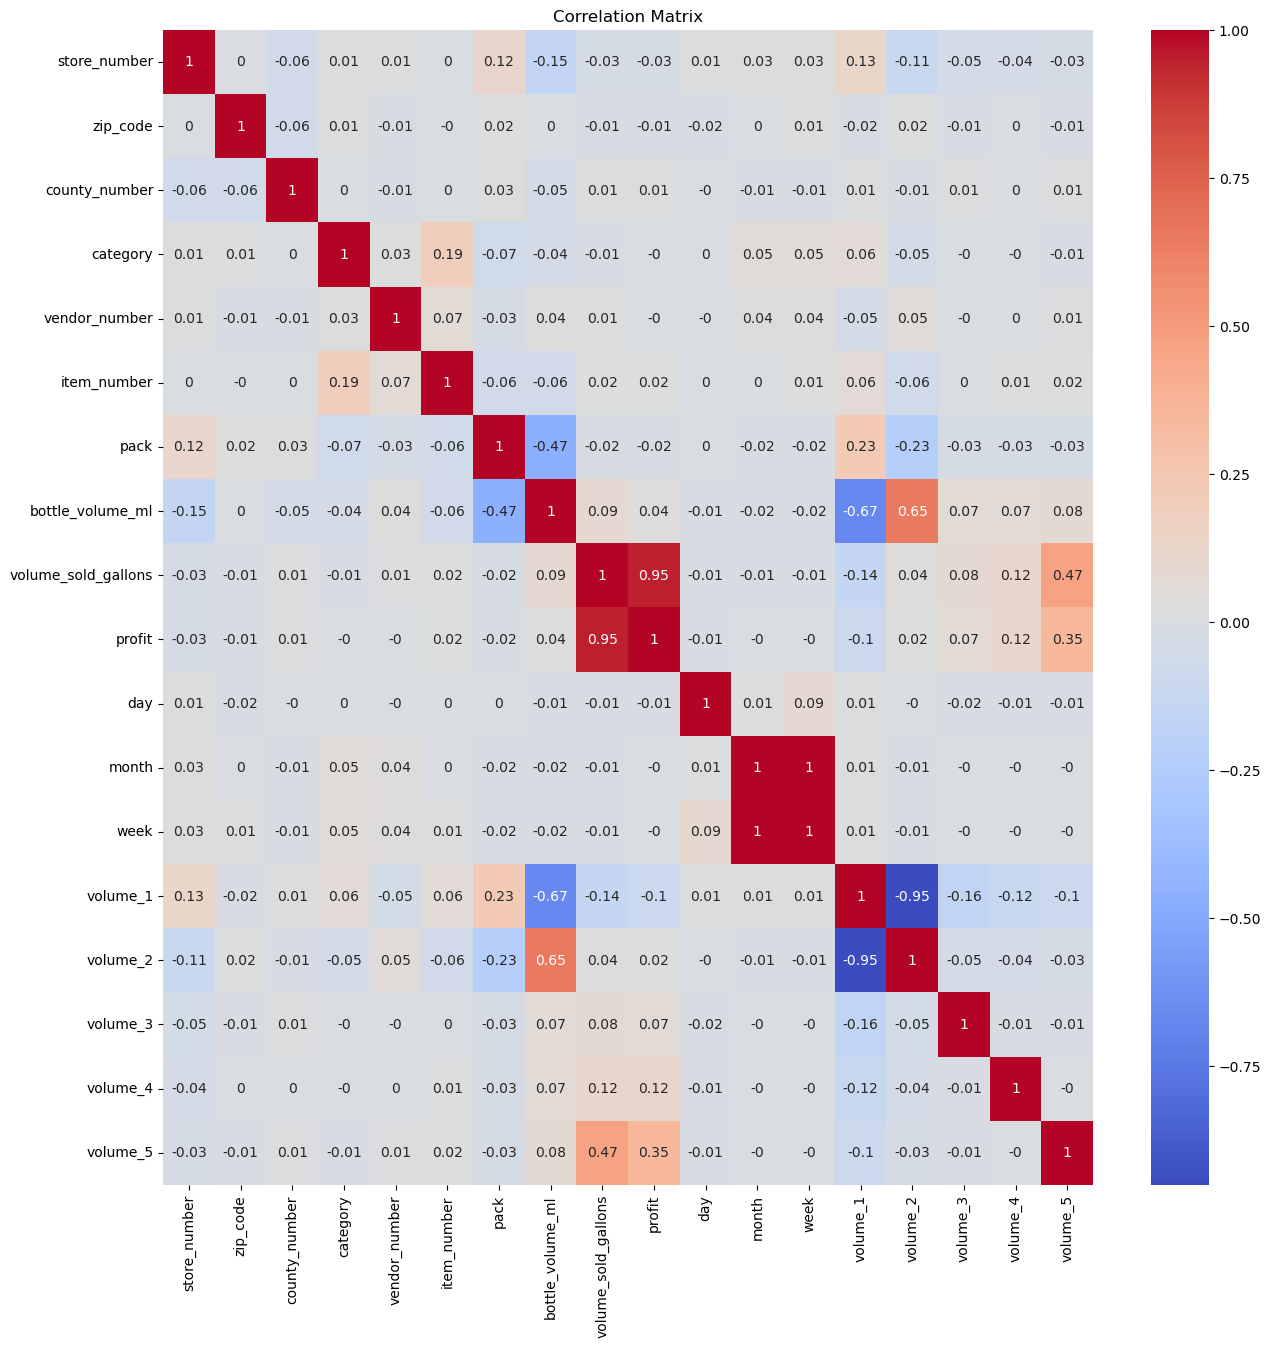

In [41]:
plt.figure(figsize=(15, 15))
corr_matrix = df_sub.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Drop the columns with high correlations(over 0.65)

In [42]:
df_sub_new=df_sub.drop(columns=['volume_sold_gallons','month','volume_1'])

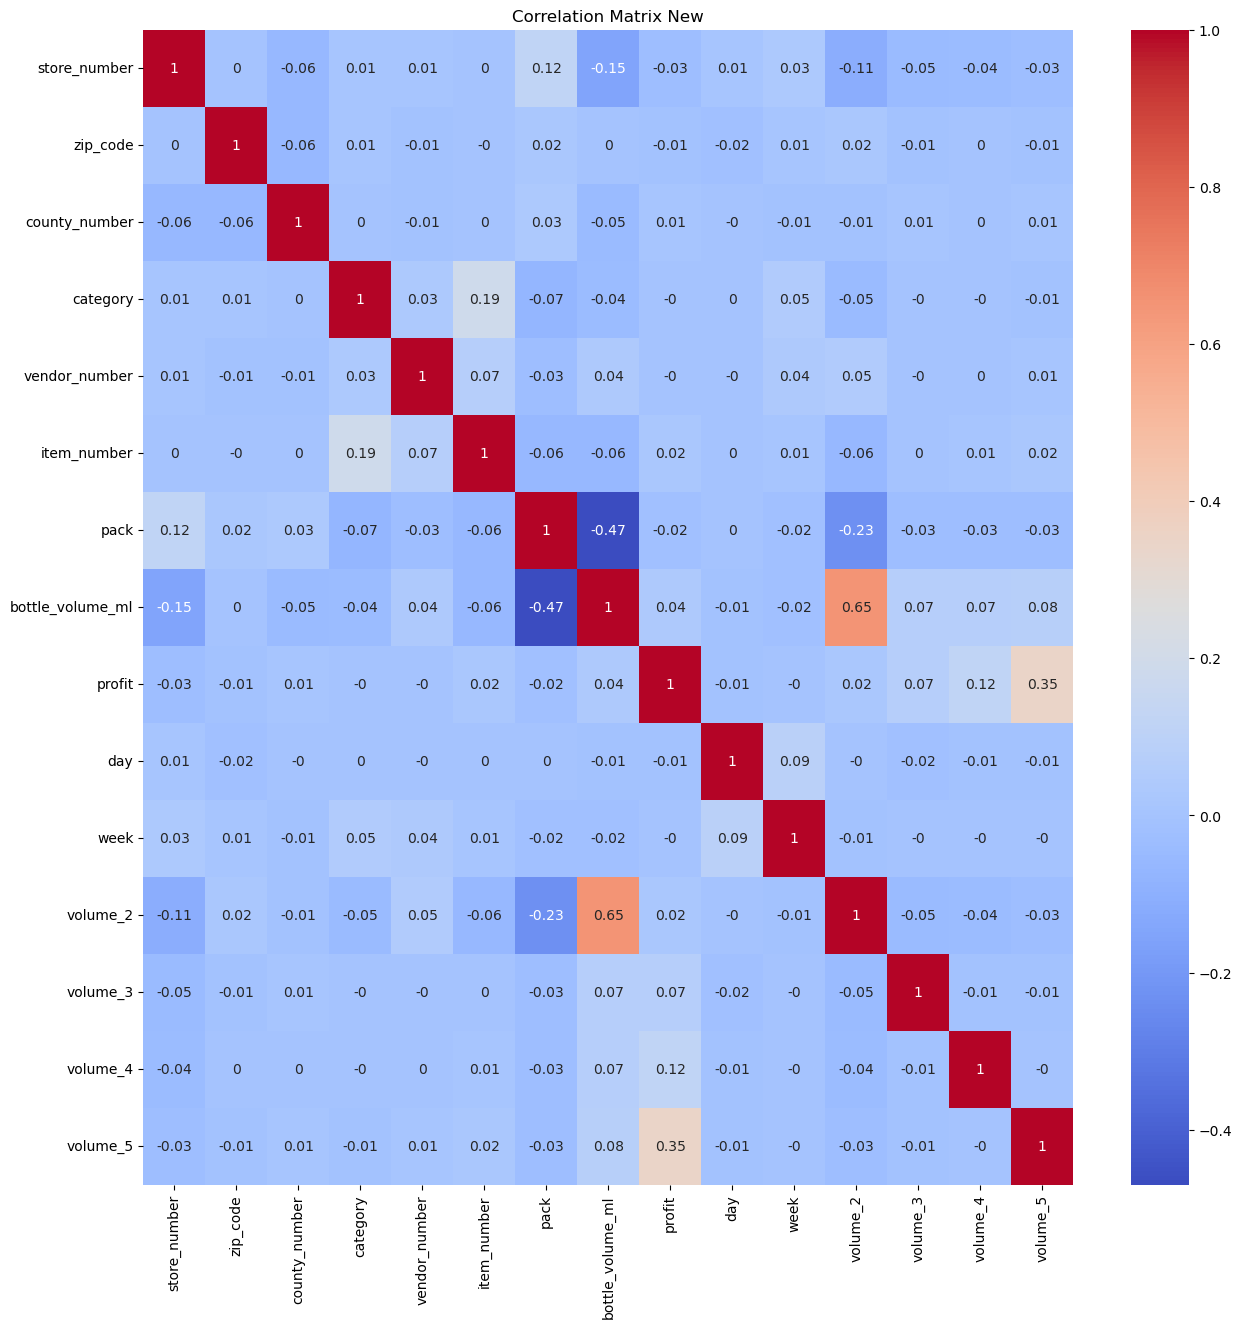

In [43]:
plt.figure(figsize=(15, 15))
corr_matrix = df_sub_new.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix New')
plt.show()

Drop the column with high correlation(over 0.5)

In [44]:
df_new=df_sub_new.drop(columns=['volume_2'])

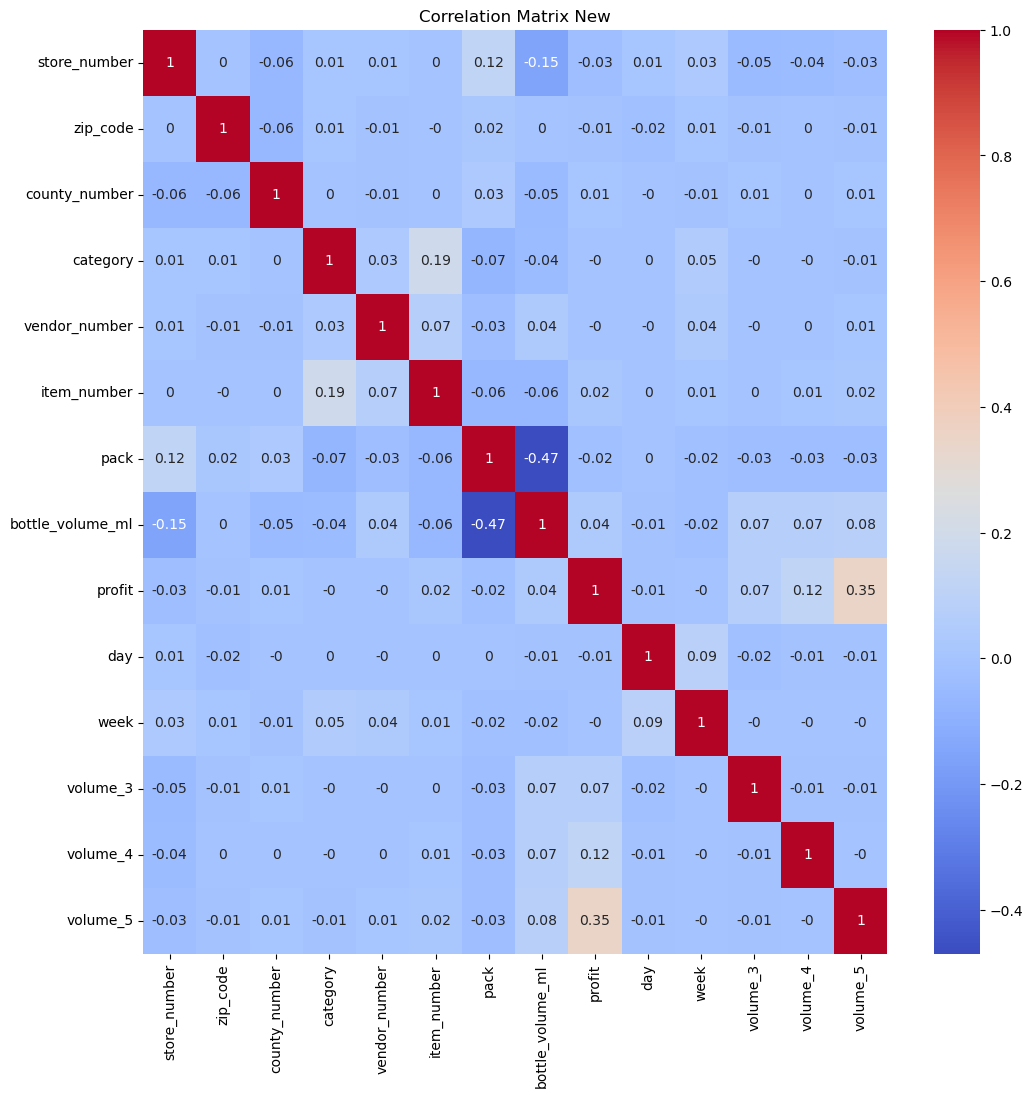

In [45]:
plt.figure(figsize=(12, 12))
corr_matrix = df_new.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix New')
plt.show()

There is a strong negative correlation (-0.47) between `pack` and `bottle_volume_ml`. We would consider to drop them after baseline model. The matrix does not reveal any strong linear relationships between the variables and profit, which suggests that a simple linear model might not be adequate for predicting profit based on these variables alone. We need to consider more complex models.

In [46]:
df_new.to_parquet('IowaNew.parquet')